## Начало лабораторной

Цены на кофе - https://www.kaggle.com/datasets/mayankanand2701/starbucks-stock-price-dataset

## Атрибуты

Date — Дата

Open — Открытие

High — Макс. цена

Low — Мин. цена

Close — Закрытие

Adj Close — Скорректированная цена закрытия

Volume — Объем торгов

Бизнес-цель: Улучшение финансового планирования

Использование подходов кластеризации для предсказания объемов продаж и доходов по различным сегментам

**Выгружаем данные**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

df = pd.read_csv("./static/csv/Starbucks Dataset.csv")
print(df.head())   

         Date      Open      High       Low     Close  Adj Close     Volume
0  1992-06-26  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  1992-06-29  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  1992-06-30  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  1992-07-01  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  1992-07-02  0.359375  0.359375  0.347656  0.355469   0.275860   13996800


**Очистка данных**

In [102]:

df_cleaned = df.drop(columns=['Date'], errors='ignore').dropna()
print(df_cleaned.head())  # Вывод очищенного DataFrame


       Open      High       Low     Close  Adj Close     Volume
0  0.328125  0.347656  0.320313  0.335938   0.260703  224358400
1  0.339844  0.367188  0.332031  0.359375   0.278891   58732800
2  0.367188  0.371094  0.343750  0.347656   0.269797   34777600
3  0.351563  0.359375  0.339844  0.355469   0.275860   18316800
4  0.359375  0.359375  0.347656  0.355469   0.275860   13996800


**Визуализация парных взаимосвязей**

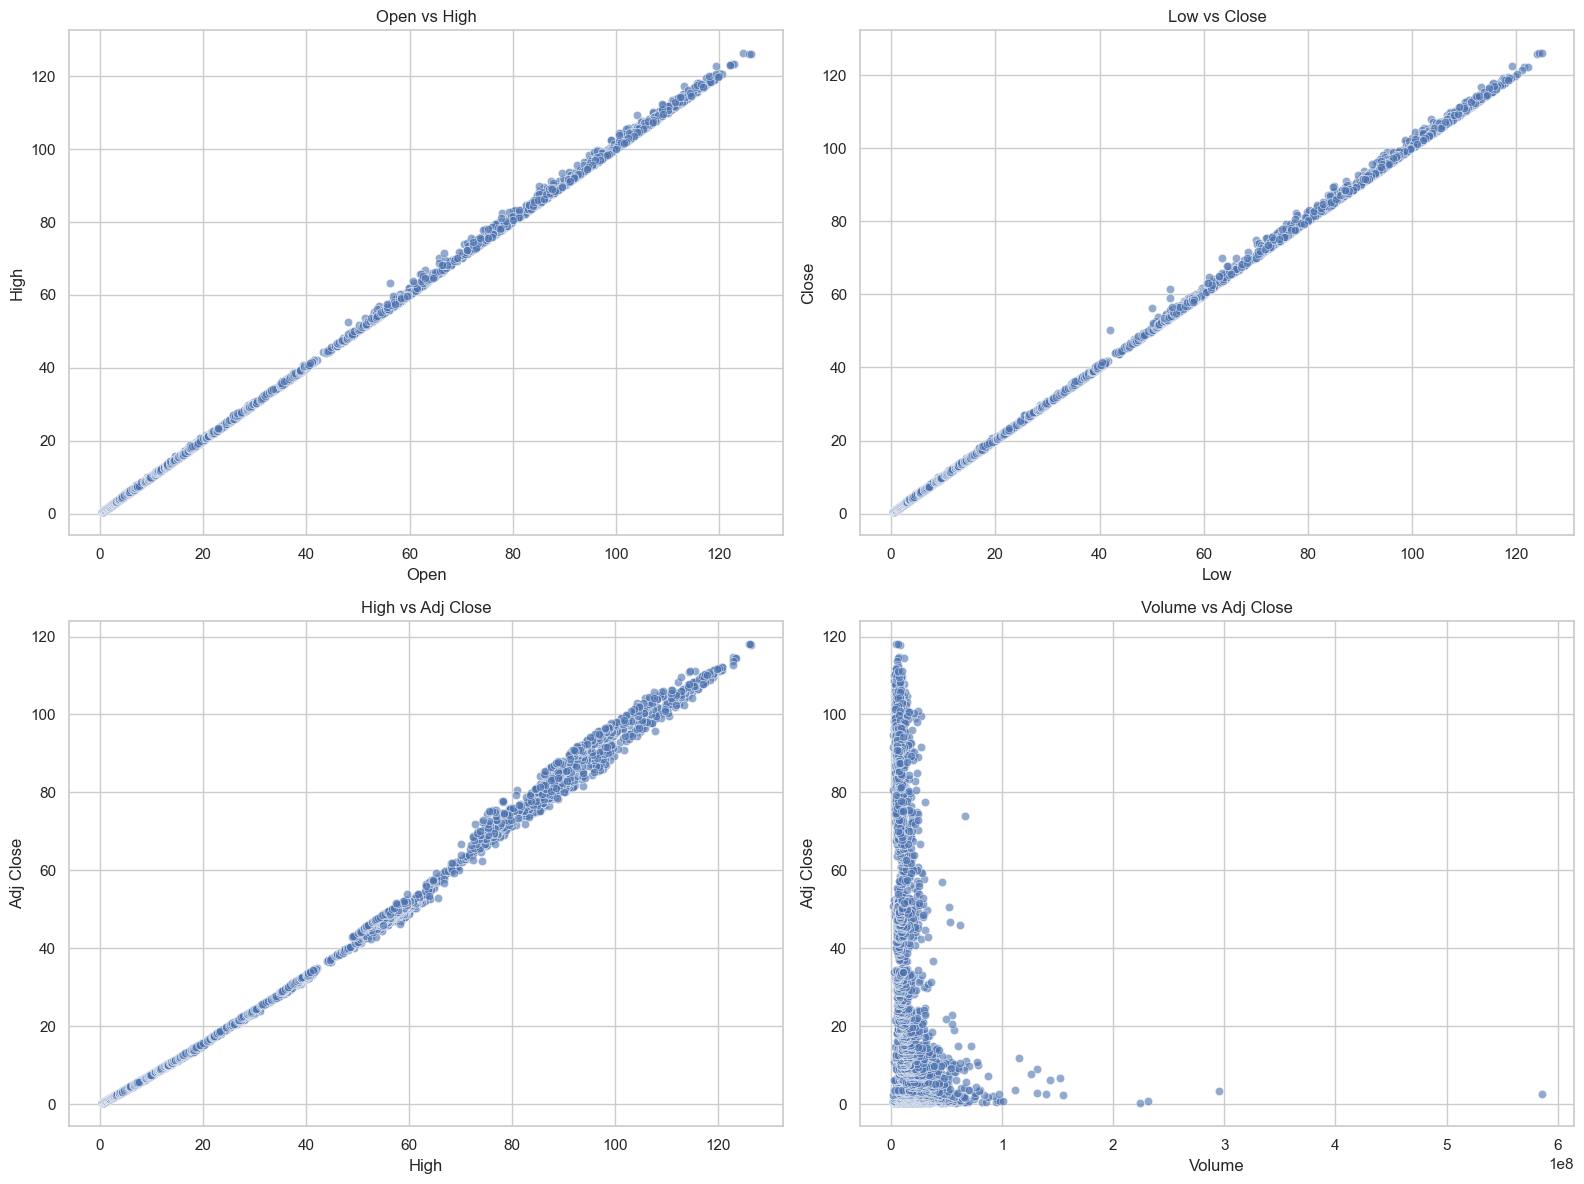

In [ ]:

sns.set(style="whitegrid")

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], alpha=0.6)
plt.title('Open vs High')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], alpha=0.6)
plt.title('Low vs Close')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('High vs Adj Close')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], alpha=0.6)
plt.title('Volume vs Adj Close')

plt.tight_layout()
plt.show()


**Стандартизация данных для кластеризации**



In [112]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_cleaned)


**Агломеративная (иерархическая) кластеризация**


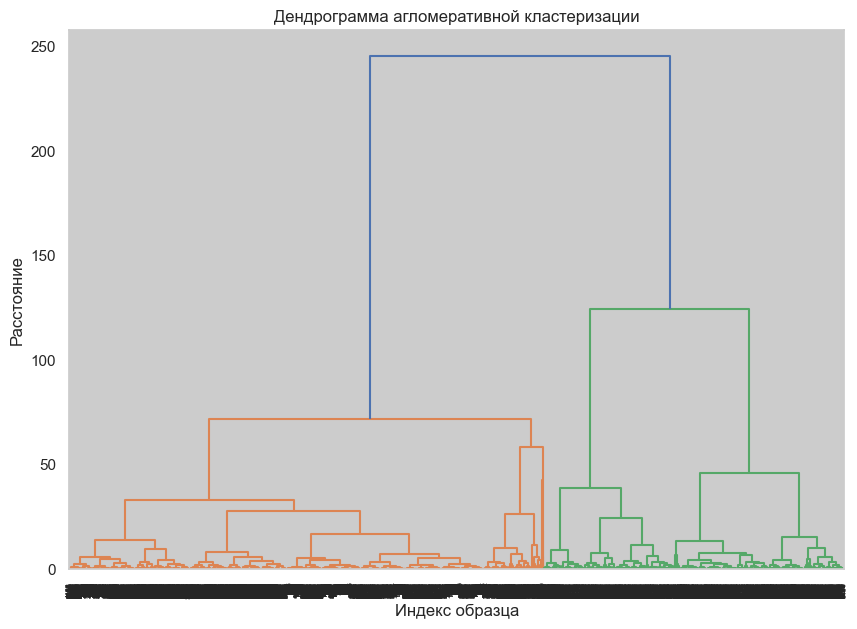

[11  9  6 ... 14 14 15]


In [106]:
linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Дендрограмма агломеративной кластеризации')
plt.xlabel('Индекс образца')
plt.ylabel('Расстояние')
plt.show()

# Получение результатов кластеризации с заданным порогом
result = fcluster(linkage_matrix, t=10, criterion='distance')
print(result)  # Вывод результатов кластеризации


**Визуализация распределения кластеров**


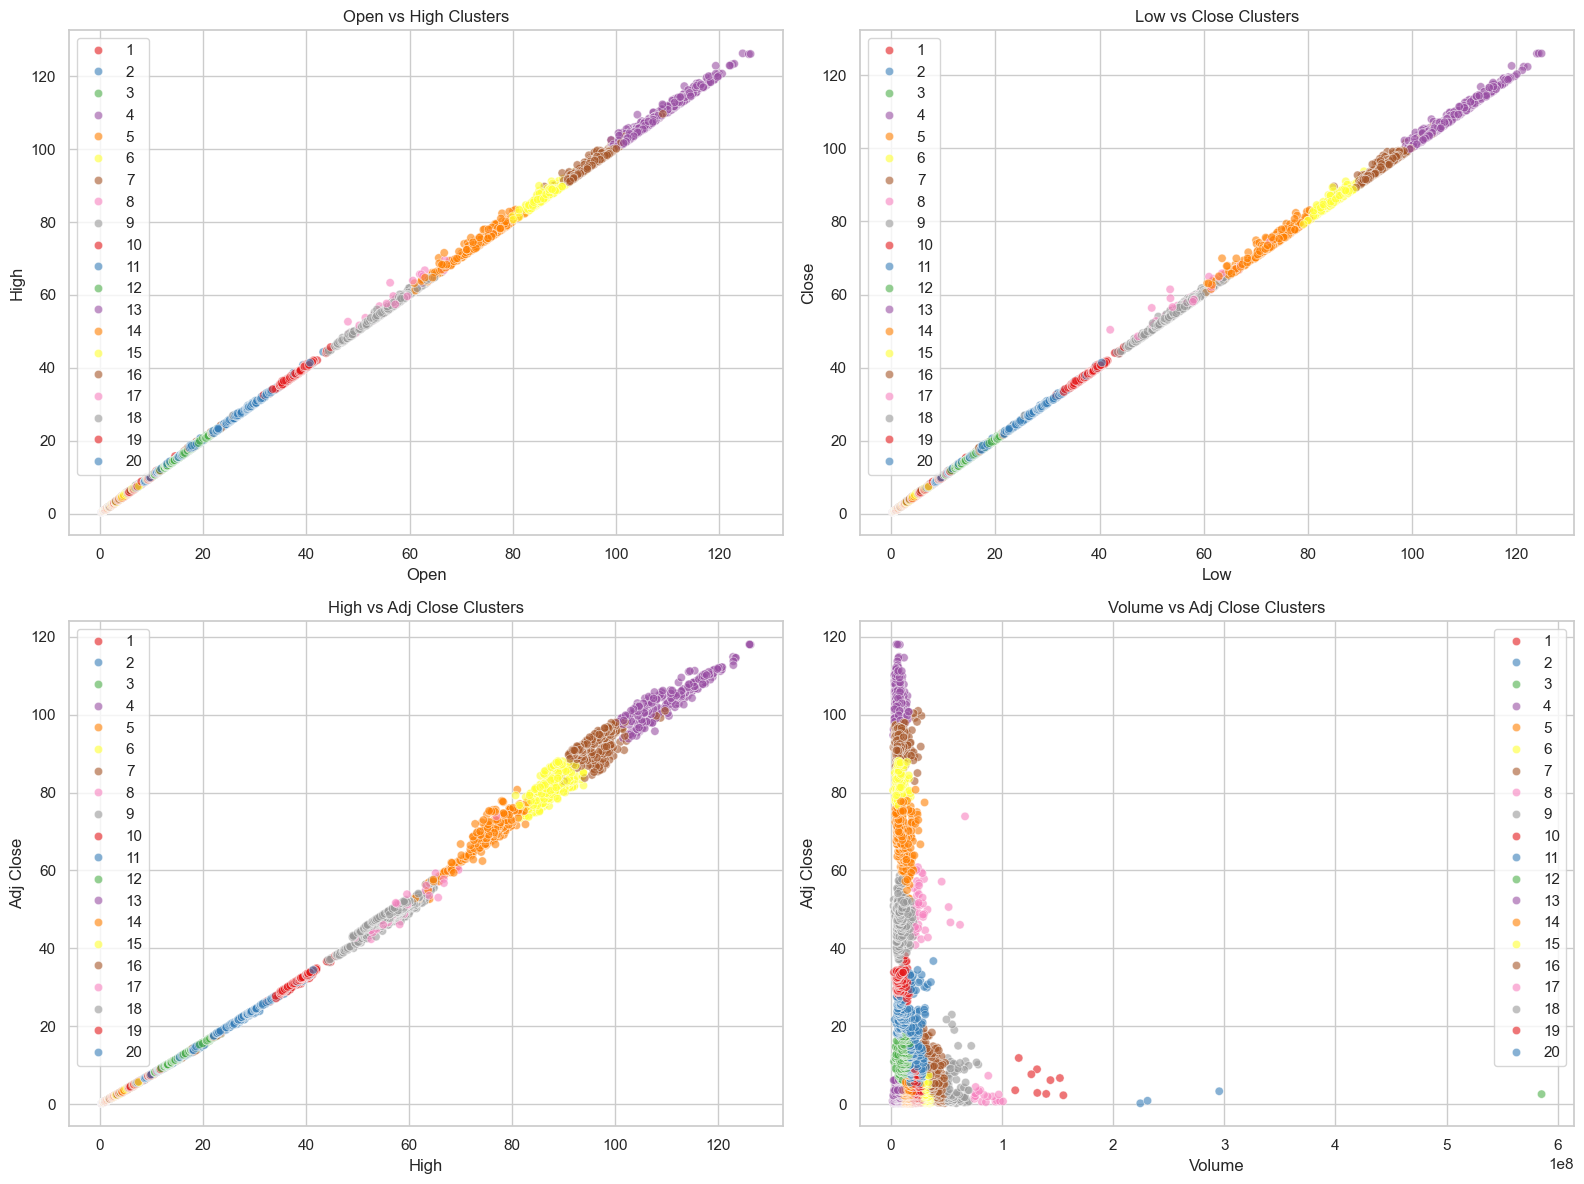

In [107]:
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=result, palette='Set1', alpha=0.6)
plt.title('Open vs High Clusters')

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Low vs Close Clusters')

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('High vs Adj Close Clusters')

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=result, palette='Set1', alpha=0.6)
plt.title('Volume vs Adj Close Clusters')

plt.tight_layout()
plt.show()



**KMeans (неиерархическая кластеризация) для сравнения**


Центры кластеров:
 [[1.11514668e+01 1.12730106e+01 1.10263573e+01 1.11517428e+01
  8.88448878e+00 1.38211576e+07]
 [7.75090604e+01 7.82228147e+01 7.67780822e+01 7.75181228e+01
  7.11609142e+01 8.57799102e+06]
 [6.49827065e+00 6.66207109e+00 6.35238963e+00 6.51956023e+00
  5.11050859e+00 4.27841811e+07]]


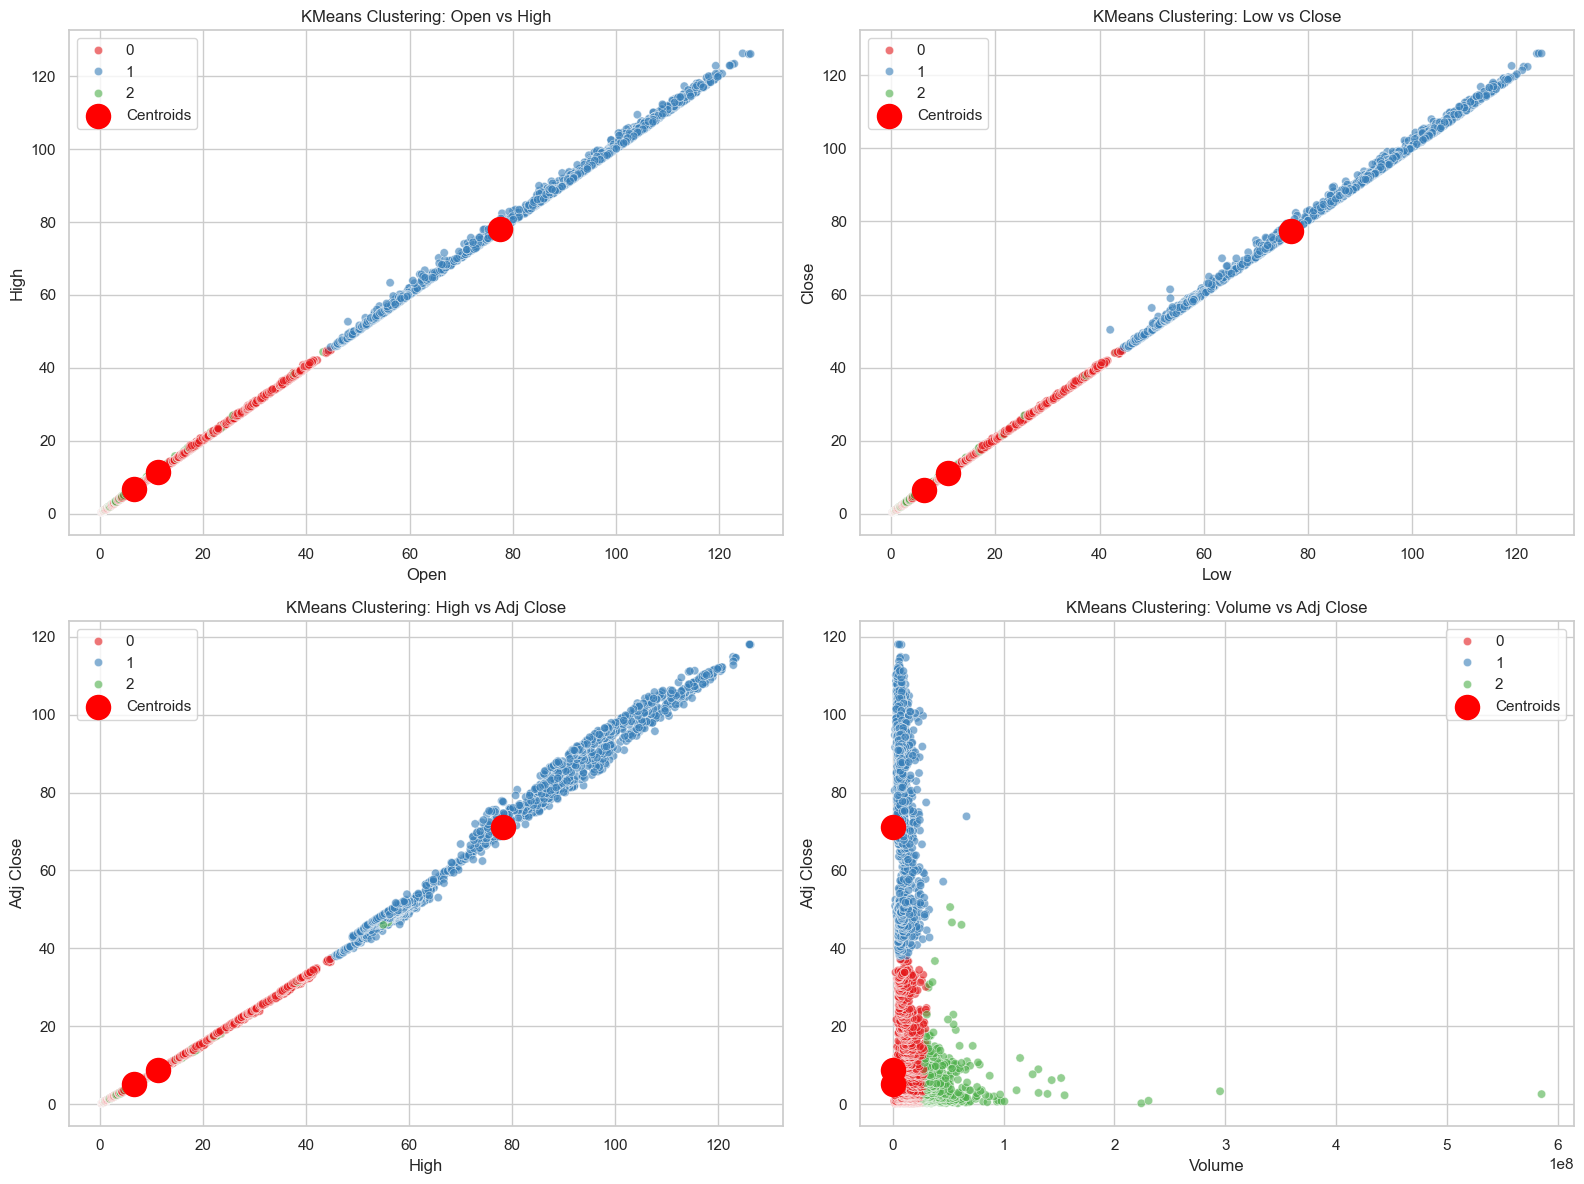

In [108]:
random_state = 9
kmeans = KMeans(n_clusters=3, random_state=random_state)
labels = kmeans.fit_predict(data_scaled)
centers = kmeans.cluster_centers_

# Отображение центроидов
centers = scaler.inverse_transform(centers)  # Обратная стандартизация
print("Центры кластеров:\n", centers)

# Визуализация результатов кластеризации KMeans
plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.scatterplot(x=df_cleaned['Open'], y=df_cleaned['High'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Open vs High')
plt.legend()

plt.subplot(2, 2, 2)
sns.scatterplot(x=df_cleaned['Low'], y=df_cleaned['Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 2], centers[:, 3], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Low vs Close')
plt.legend()

plt.subplot(2, 2, 3)
sns.scatterplot(x=df_cleaned['High'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 1], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: High vs Adj Close')
plt.legend()

plt.subplot(2, 2, 4)
sns.scatterplot(x=df_cleaned['Volume'], y=df_cleaned['Adj Close'], hue=labels, palette='Set1', alpha=0.6)
plt.scatter(centers[:, 3], centers[:, 4], s=300, c='red', label='Centroids')
plt.title('KMeans Clustering: Volume vs Adj Close')
plt.legend()

plt.tight_layout()
plt.show()


**PCA для визуализации сокращенной размерности**


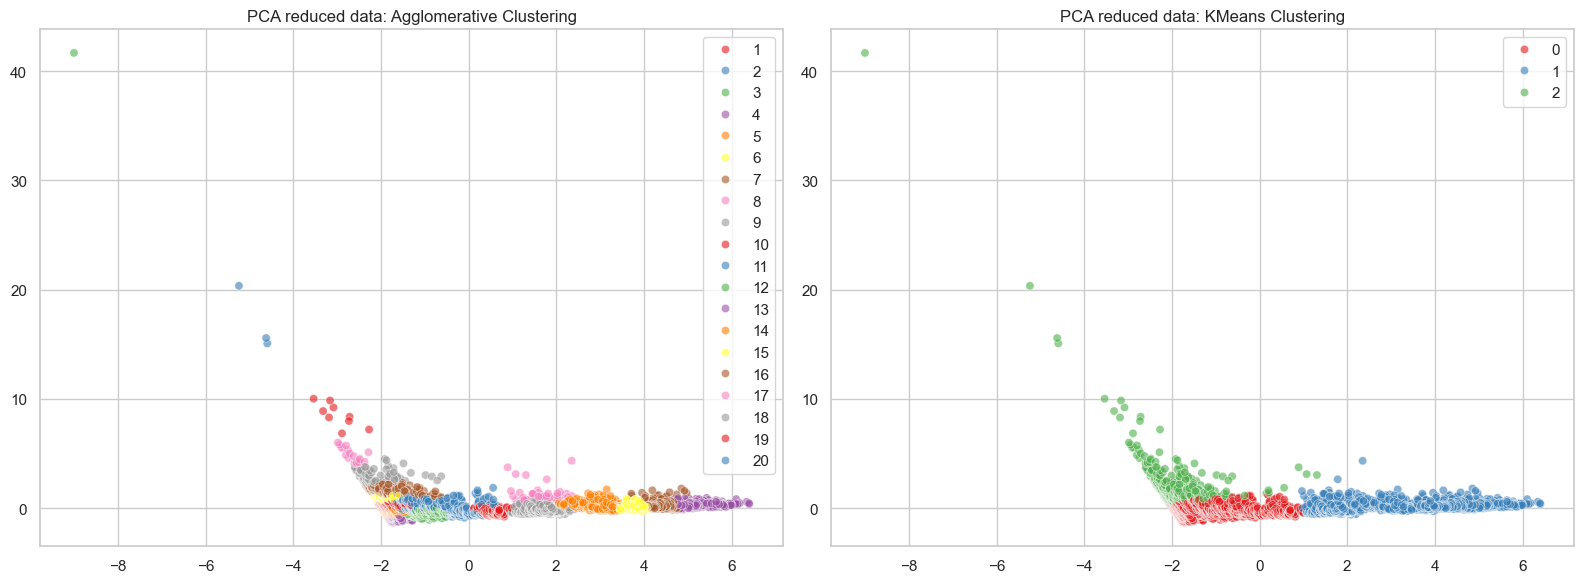

In [109]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data_scaled)

# Визуализация сокращенных данных
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=result, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: Agglomerative Clustering')

plt.subplot(1, 2, 2)
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=labels, palette='Set1', alpha=0.6)
plt.title('PCA reduced data: KMeans Clustering')

plt.tight_layout()
plt.show()


**Анализ инерции для метода локтя (метод оценки суммы квадратов расстояний)**


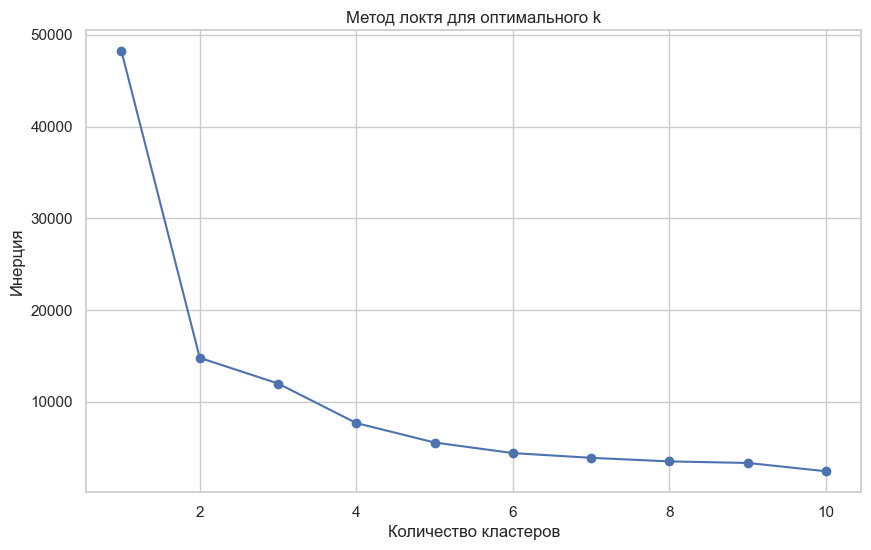

In [ ]:
inertias = []
clusters_range = range(1, 11)
for i in clusters_range:
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertias, marker='o')
plt.title('Метод локтя для оптимального k')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.grid(True)
plt.show()


**Расчет коэффициентов силуэта**


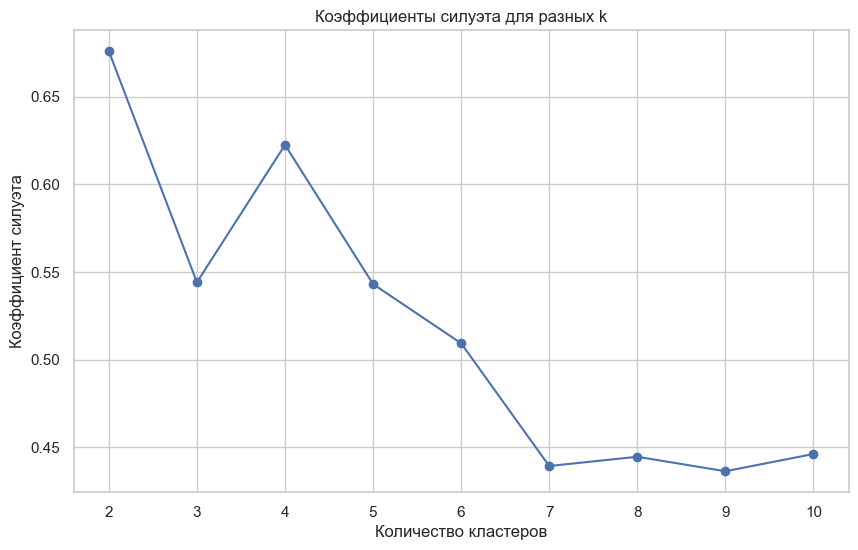

In [ ]:
silhouette_scores = []
for i in clusters_range[1:]:  
    kmeans = KMeans(n_clusters=i, random_state=random_state)
    labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, labels)
    silhouette_scores.append(score)

# Построение диаграммы значений силуэта
plt.figure(figsize=(10, 6))
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title('Коэффициенты силуэта для разных k')
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.grid(True)
plt.show()

Средний коэффициент силуэта: 0.547


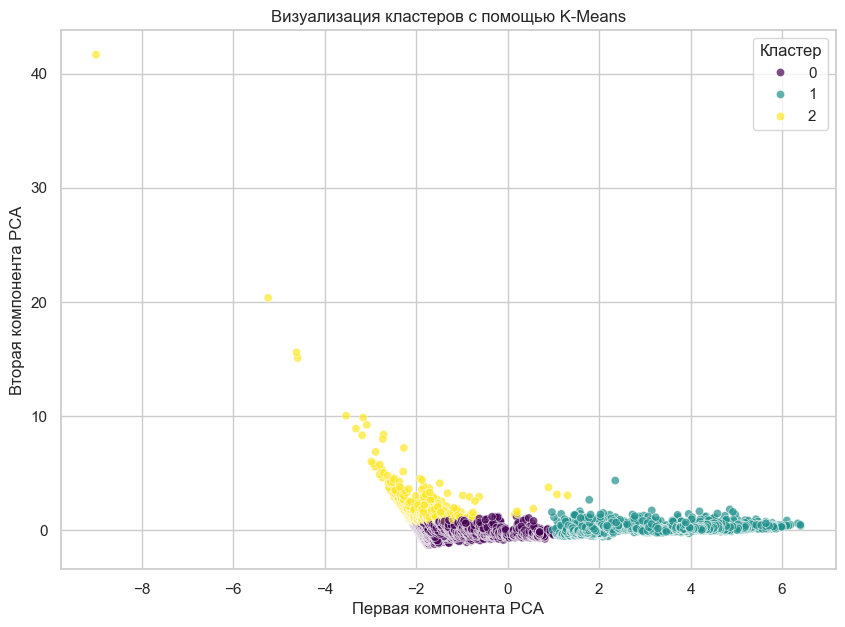

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# ========================
# Применение K-Means
# ========================
kmeans = KMeans(n_clusters=3, random_state=42)  
df_clusters = kmeans.fit_predict(df_scaled)

# ========================
# Оценка качества кластеризации
# ========================
silhouette_avg = silhouette_score(df_scaled, df_clusters)
print(f'Средний коэффициент силуэта: {silhouette_avg:.3f}')

# ========================
# Визуализация кластеров
# ========================
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df_clusters, palette='viridis', alpha=0.7)
plt.title('Визуализация кластеров с помощью K-Means')
plt.xlabel('Первая компонентa PCA')
plt.ylabel('Вторая компонентa PCA')
plt.legend(title='Кластер', loc='upper right')
plt.show()
# что-то такое

Средний коэффициент силуэта, равный 0.547, указывает на умеренно хорошую кластеризацию.